# Twitter Sentiment Analysis

## Importing the modules

In [16]:
import re # regular expressions
import nltk # text manuplations
import warnings
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## optional pandas and warning settings

In [3]:
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Load and Read DataSet

In [4]:
train = pd.read_csv('../Data/train_data.csv')
test = pd.read_csv('../Data/test_data.csv')

## Inspecting the data

Let's have a look some non-sexist/non-racist tweets in our data

In [5]:
train[train['label'] == 0].head(10) #first 10 rows

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


Now let's check out some racist/sexist tweets

In [7]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


   So as you see we have many characters and words that not really valuable. We need to keep only the words that important for us.
   
   Let's check the dimensions of our train and test dataset.

In [11]:
train_shape = train.shape
test_shape = test.shape
17197

In [13]:
train_shape, test_shape

((31962, 3), (17197, 2))

We have 31962 tweets in train dataset and 17197 in test dataset
Let's have a glimpse at label-distribion in the train dataset

In [14]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

in train dataset we have 2242 tweets that labeled racist or sexist. and 29720 as non-racist/non-sexsist tweets. So we have an imbalanced classification challenge.

Now we will check distribition length of this tweets, in term of words, both train and test dataset.

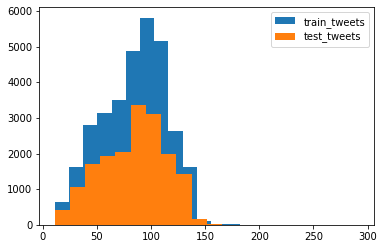

In [17]:
len_train = train['tweet'].str.len()
len_test = test['tweet'].str.len()
plt.hist(len_train, bins=20, label="train_tweets")
plt.hist(len_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

## Data Cleaning

Data cleaning is the one of the important parts of a NLP project. We need to clean unused or un-valuable features in the data-set otherwise we need to deal with unconsistent data.
    Before we strat the cleaning data, lets combine it. That will make it convinient the preprocess of data.

In [21]:
combine = train.append(test, ignore_index=True)
combine.shape

(49159, 3)

Okay, now let's code a function that makes easy the removing patterns in cleaning process 

In [22]:
def remove_pattern(input_text, pattern):
    r = re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
    return input_text